<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [95]:
import pandas as pd

In [96]:
url = '/content/drive/MyDrive/Math_with_python/prestacar.csv'

In [97]:
datos = pd.read_csv(url)

In [98]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [99]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [100]:
X = datos.drop('moroso', axis=1)
y = datos['moroso']

In [101]:
X.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0


In [102]:
y.head()

,moroso
0,0
1,0
2,0
3,0
4,0


In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [105]:
print('Precisión del modelo: {:.2f}%'.format(modelo.score(X, y)*100))

Precisión del modelo: 100.00%


In [106]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X, y)
dummy.score(X, y)

0.9127070800555298

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)

In [109]:
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [110]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print(f'la exactitud del modelo base es de: {dummy.score(X_train, y_train)}')
print(f'la exactitud del modelo base es de: {dummy.score(X_val, y_val)}')

la exactitud del modelo base es de: 0.9126887340301975
la exactitud del modelo base es de: 0.9127253723543245


In [111]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'la exactitud del modelo de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'la exactitud del modelo de validación es de: {modelo.score(X_val, y_val)}')

la exactitud del modelo de entrenamiento es de: 0.9205865272938444
la exactitud del modelo de validación es de: 0.9061057399181256


### Evaluando el modelo

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
y_previstos = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previstos)
print(matriz_confusion)

[[10361   118]
 [  960    42]]


In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

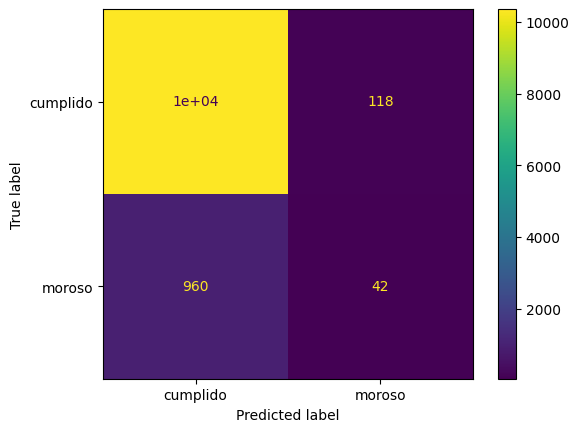

In [115]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=['cumplido','moroso'])
visualizacion.plot();

 Utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
modelo_random = RandomForestClassifier(max_depth=10)
modelo_random.fit(X_train, y_train)
print(f'la exactitud del modelo de entrenamiento es de: {modelo_random.score(X_train, y_train)}')
print(f'la exactitud del modelo de validación es de: {modelo_random.score(X_val, y_val)}')

la exactitud del modelo de entrenamiento es de: 0.9155632984901277
la exactitud del modelo de validación es de: 0.9130737740614929


In [118]:
y_previstos_random = modelo_random.predict(X_val)
matriz_confusion_random = confusion_matrix(y_val, y_previstos_random)
print(matriz_confusion_random)

[[10479     0]
 [  998     4]]


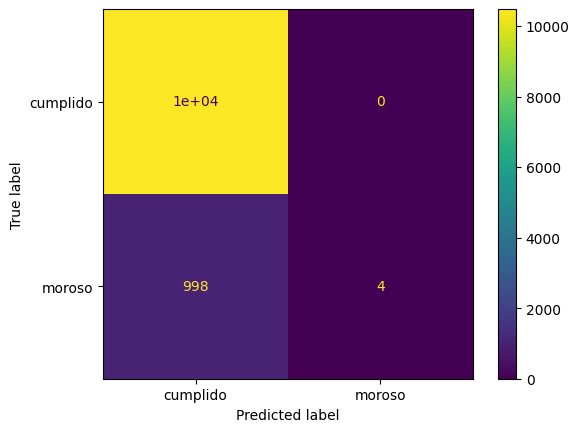

In [119]:
visualizacion_random = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_random,display_labels=['cumplido','moroso'])
visualizacion_random.plot();

1. Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

2. Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

3. La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4. La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [120]:
url_pacientes = '/content/drive/MyDrive/Math_with_python/diabetes.csv'


In [121]:
datos_pacientes = pd.read_csv(url_pacientes)

In [122]:
X_diabetes = datos_pacientes.drop('diabetes', axis=1)
y_diabetes = datos_pacientes['diabetes']

In [123]:
X_diabetes.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398


In [124]:
X_diabetes,X_diabetes_train,y_diabetes,y_diabetes_train = train_test_split(X_diabetes,y_diabetes,test_size=0.25,stratify=y_diabetes,random_state=5)
X_diabetes_train,X_diabetes_val,y_diabetes_train,y_diabetes_val = train_test_split(X_diabetes,y_diabetes,stratify=y_diabetes,random_state=5)

In [125]:
modelo_diabetes = DecisionTreeClassifier(max_depth=3)
modelo_diabetes.fit(X_diabetes_train, y_diabetes_train)
print(f'la exactitud del modelo de entrenamiento es de: {modelo_diabetes.score(X_diabetes_train, y_diabetes_train)}')
print(f'la exactitud del modelo de validación es de: {modelo_diabetes.score(X_diabetes_val, y_diabetes_val)}')


la exactitud del modelo de entrenamiento es de: 0.7873303167420814
la exactitud del modelo de validación es de: 0.6891891891891891


In [126]:
y_diabetes_previstos = modelo_diabetes.predict(X_diabetes_val)
matriz_confusion_diabetes = confusion_matrix(y_diabetes_val, y_diabetes_previstos)
print(matriz_confusion_diabetes)

[[39 11]
 [12 12]]


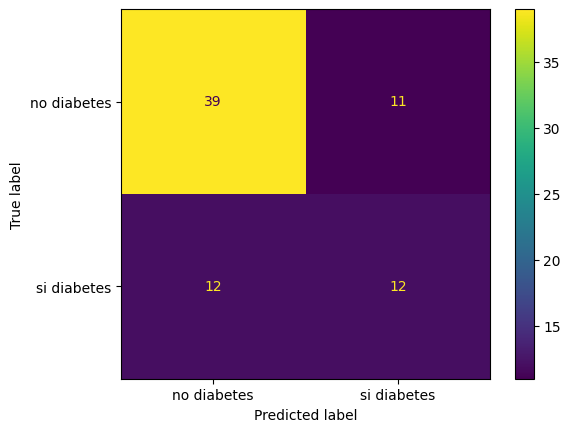

In [127]:
visualizacion_diabetes = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_diabetes,display_labels=['no diabetes','si diabetes'])
visualizacion_diabetes.plot();

In [128]:
modelo_diabetes_random = RandomForestClassifier(max_depth=2)
modelo_diabetes_random.fit(X_diabetes_train, y_diabetes_train)
print(f'la exactitud del modelo de entrenamiento es de: {modelo_diabetes_random.score(X_diabetes_train, y_diabetes_train)}')
print(f'la exactitud del modelo de validación es de: {modelo_diabetes_random.score(X_diabetes_val, y_diabetes_val)}')

la exactitud del modelo de entrenamiento es de: 0.746606334841629
la exactitud del modelo de validación es de: 0.7702702702702703


In [129]:
y_diabetes_previstos_random = modelo_diabetes_random.predict(X_diabetes_val)
matriz_confusion_diabetes_random = confusion_matrix(y_diabetes_val, y_diabetes_previstos_random)
print(matriz_confusion_diabetes_random)

[[48  2]
 [15  9]]


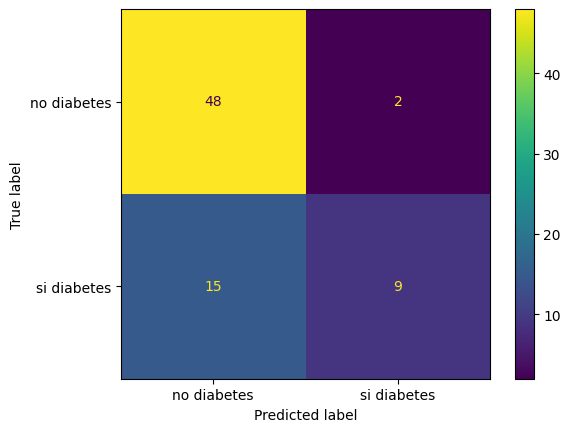

In [130]:
visualizacion_diabetes_random = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_diabetes_random,display_labels=['no diabetes','si diabetes'])
visualizacion_diabetes_random.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [132]:
print(f'la exactitud del modelo  es de: {accuracy_score(y_val, y_previstos)}')
print(f'la precision del modelo  es de: {precision_score(y_val, y_previstos)}')
print(f'la sensabilidad del modelo es de: {recall_score(y_val, y_previstos)}')
print(f'la f1 del modelo  es de: {f1_score(y_val, y_previstos)}')

la exactitud del modelo  es de: 0.9061057399181256
la precision del modelo  es de: 0.2625
la sensabilidad del modelo es de: 0.041916167664670656
la f1 del modelo  es de: 0.07228915662650602


### Curva ROC

In [133]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [134]:
from sklearn.metrics import RocCurveDisplay

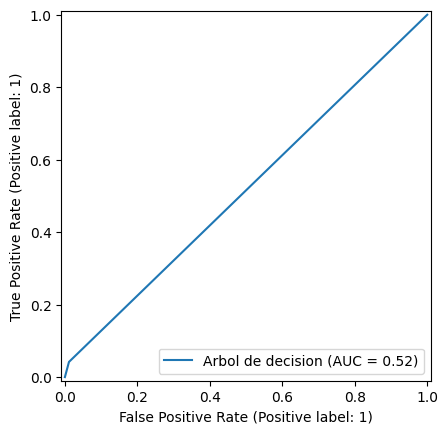

In [135]:
RocCurveDisplay.from_predictions(y_val,y_previstos, name='Arbol de decision');

In [136]:
from sklearn.metrics import roc_auc_score

In [137]:
print(f'el area bajo la curva del modelo es de: {roc_auc_score(y_val,y_previstos)}')

el area bajo la curva del modelo es de: 0.5153277755968168


### Curva de  precisión x sensibilidad

In [138]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [139]:
from sklearn.metrics import PrecisionRecallDisplay

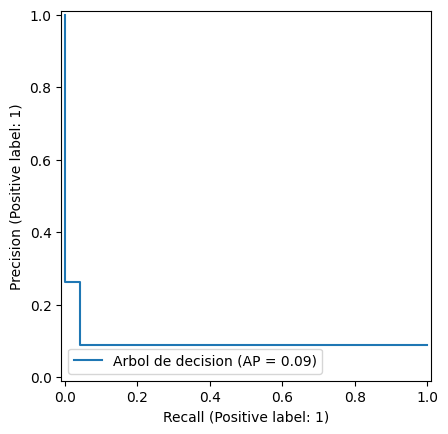

In [140]:
PrecisionRecallDisplay.from_predictions(y_val,y_previstos, name='Arbol de decision');

In [141]:
from sklearn.metrics import average_precision_score

In [142]:
print(f'score promedio de precision vs recall es: {average_precision_score(y_val,y_previstos)}')

score promedio de precision vs recall es: 0.09461940373238367


### Informe de métricas

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_val, y_previstos))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [145]:
print(f'la exactitud del modelo  es de: {accuracy_score(y_diabetes_val, y_diabetes_previstos)}')
print(f'la precision del modelo  es de: {precision_score(y_diabetes_val, y_diabetes_previstos)}')
print(f'la sensabilidad del modelo es de: {recall_score(y_diabetes_val, y_diabetes_previstos)}')
print(f'la f1 del modelo  es de: {f1_score(y_diabetes_val, y_diabetes_previstos)}')

la exactitud del modelo  es de: 0.6891891891891891
la precision del modelo  es de: 0.5217391304347826
la sensabilidad del modelo es de: 0.5
la f1 del modelo  es de: 0.5106382978723404


el area bajo la curva del modelo es de: 0.64


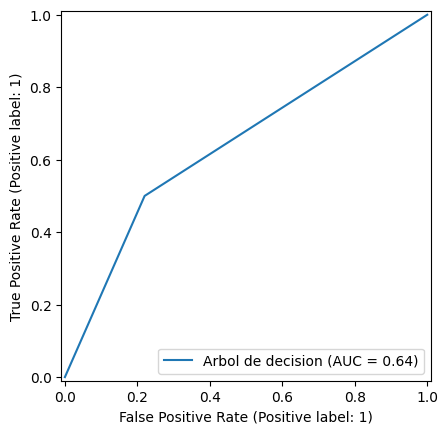

In [146]:
RocCurveDisplay.from_predictions(y_diabetes_val, y_diabetes_previstos, name='Arbol de decision')
print(f'el area bajo la curva del modelo es de: {roc_auc_score(y_diabetes_val, y_diabetes_previstos)}')

In [147]:
print(f'score promedio de precision vs recall es: {average_precision_score(y_diabetes_val, y_diabetes_previstos)}')

score promedio de precision vs recall es: 0.42303172737955347


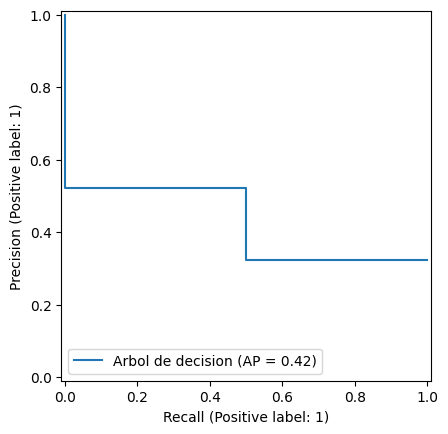

In [148]:
PrecisionRecallDisplay.from_predictions(y_diabetes_val, y_diabetes_previstos, name='Arbol de decision')

In [149]:
print(classification_report(y_diabetes_val, y_diabetes_previstos))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        50
           1       0.52      0.50      0.51        24

    accuracy                           0.69        74
   macro avg       0.64      0.64      0.64        74
weighted avg       0.69      0.69      0.69        74



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [150]:
from sklearn.model_selection import KFold, cross_validate

In [151]:
modelo = DecisionTreeClassifier(max_depth=10)

In [152]:
kf = KFold(n_splits=5, shuffle=True, random_state=5)

In [153]:
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.24898791, 0.23676968, 0.23504758, 0.25387859, 0.23900723]),
 'score_time': array([0.00371766, 0.00366902, 0.00341988, 0.0036478 , 0.00345969]),
 'test_score': array([0.91333696, 0.90788328, 0.90690331, 0.91376307, 0.89960801])}

In [154]:
promedio = cv_resultados['test_score'].mean()
desvio_estandar = cv_resultados['test_score'].std()
print(f'la exactitud del modelo es de: {promedio} +/- {desvio_estandar}')
print(f'el intervalo de confianza es:[{promedio - 2*desvio_estandar}, {promedio + 2*desvio_estandar}]')

la exactitud del modelo es de: 0.908298925588797 +/- 0.005155406890876975
el intervalo de confianza es:[0.8979881118070431, 0.9186097393705509]


### Validación cruzada con sensibilidad

In [155]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_estandar = resultados['test_score'].std()
  return f'el intervalo de confianza es:[{promedio - 2*desvio_estandar}, {min(promedio + 2*desvio_estandar,1)}]'

In [156]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf,scoring = 'recall')
cv_resultados

{'fit_time': array([0.24818659, 0.24661684, 0.25341916, 0.24086666, 0.24403882]),
 'score_time': array([0.00717425, 0.00613999, 0.00744557, 0.00628853, 0.0070734 ]),
 'test_score': array([0.02906209, 0.01980198, 0.0196802 , 0.01697128, 0.02427746])}

In [157]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza es:[0.013447331111684701, 0.030469868971121847]'

In [158]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados


{'fit_time': array([0.24591112, 0.26061821, 0.24415326, 0.23888993, 0.23540926]),
 'score_time': array([0.01377511, 0.01318431, 0.01299834, 0.01275539, 0.01359177]),
 'test_accuracy': array([0.91322809, 0.90733885, 0.90799216, 0.91332753, 0.89917247]),
 'test_recall': array([0.02906209, 0.01980198, 0.02091021, 0.0156658 , 0.02427746]),
 'test_precision': array([0.26190476, 0.21333333, 0.25757576, 0.22222222, 0.2038835 ]),
 'test_f1': array([0.05231867, 0.03624009, 0.03868032, 0.02926829, 0.04338843])}

In [159]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [160]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8978637375381687, 0.9185599023534131]
Intervalo de confianza(test_recall): [0.012946395360114165, 0.03094061643125333]
Intervalo de confianza(test_precision): [0.18460113817584084, 0.2789666898968416]
Intervalo de confianza(test_f1): [0.024635708152911835, 0.05532261177952819]


### Estratificando los datos

In [161]:
datos['moroso'].value_counts(normalize = True)

,proportion
moroso,
0,0.912707
1,0.087293


In [162]:
from sklearn.model_selection import StratifiedKFold

In [163]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [164]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza es:[0.020179340396840224, 0.03669283621531229]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [167]:
y_balanceada.value_counts(normalize = True)

,proportion
moroso,
0,0.5
1,0.5


In [168]:
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [169]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [170]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza es:[0.7035031850121296, 0.7456290349170069]'

### Pipeline para validación

In [171]:
from imblearn.pipeline import Pipeline as imbpipeline

In [172]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('oversample', SMOTE()), ('arbol', modelo)])


In [173]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X,y, cv=skf, scoring='recall')

In [174]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza es:[0.21687238832682137, 0.297962247928981]'

pipeline, se hace el proceso sobre los datos de entrenamiento para no afectar las proporciones en los datos de validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [175]:
from imblearn.under_sampling import NearMiss

In [176]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version = 3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

1. NearMiss versión 1: se calcula un promedio entre las distancias de los 3 vecinos más cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

2. NearMiss versión 2: se calcula un promedio entre las distancias de los 3 vecinos más lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

3. NearMiss versión 3: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos más cercanos, por defecto M también es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.


https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation

In [177]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza es:[0.6208195390990379, 0.6986931647842003]'

### Probando el modelo

In [88]:
undersample = NearMiss(version=3)
X_undersample, y_undersample = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



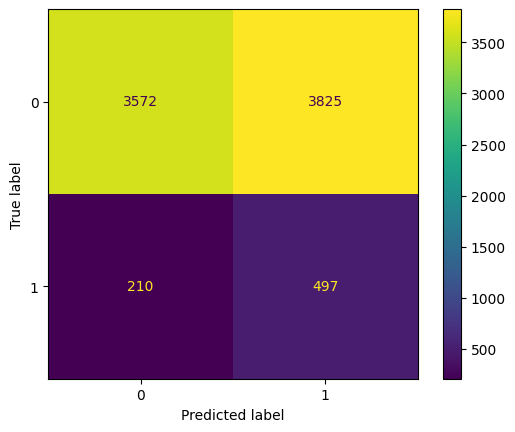

In [178]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_undersample, y_undersample)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);